### Student Information
Name: **Supakarn Jariyayong**

Student ID: **111065431**

GitHub ID: **supakarn-j**

Kaggle name: **Supakarn Jariyayong**

Kaggle private scoreboard snapshot:

![Snapshot](pics/leaderboard.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

# Begin Assignment Here

### Prepareation

1. Load data

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [2]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [3]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [4]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)



---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)
​

<AxesSubplot: xlabel='words'>

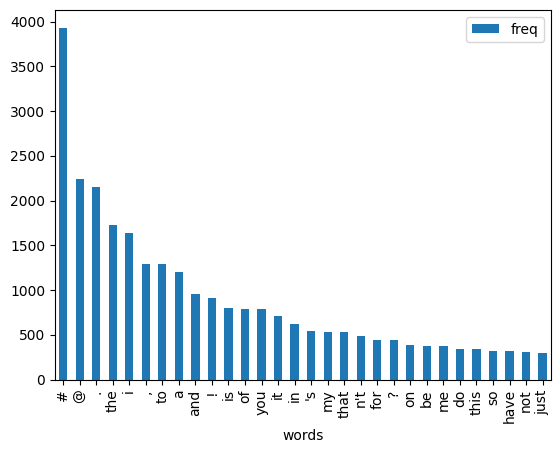

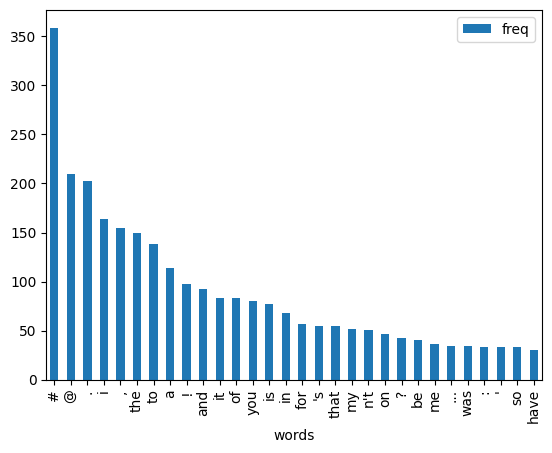

In [18]:
%matplotlib inline
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

## Calculate word frequency for train data
train_vec = CountVectorizer(tokenizer=word_tokenize)

count_train = train_vec.fit_transform(train_df.text)
train_freq = np.asarray(count_train.sum(axis=0))[0]
top30_train = pd.DataFrame(train_freq, columns=['freq'])
top30_train['words'] = train_vec.get_feature_names_out()
top30_train.sort_values(by='freq', ascending=False, inplace=True)
## plot top 30 word of train dataset
top30_train[:30].plot(x='words',kind='bar')

## Calculate word frequency for test data
test_vec = CountVectorizer(tokenizer=word_tokenize)

count_test = test_vec.fit_transform(test_df.text)
test_freq = np.asarray(count_test.sum(axis=0))[0]
top30_test = pd.DataFrame(test_freq, columns=['freq'])
top30_test['words'] = test_vec.get_feature_names_out()
top30_test.sort_values(by='freq', ascending=False, inplace=True)

## plot top 30 word of test dataset
top30_test[:30].plot(x='words',kind='bar')


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, tokenizer=word_tokenize)
tfidf = TfidfVectorizer(max_features=1000)

tfidf_test = tfidf.fit_transform(train_df.text)

tfidf.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

![](pics/ex3.png)

#### **Answer**

For this Matrix shown above given X-axis is `True label`(The actual label of that particular data), Y-axis is `Predicted label`(The result from classifications model).  
Since we got 4 labels in total, so we will have `4x4` dimension confusion matrix. From the picture we can calculate TP,FN,FP,TN as follow

TP: The model predicted correctly (eg. True label is `anger` and model predicted label is also `anger`)  
For:
- anger = 55
- fear = 76
- joy = 54
- sadness = 44

FP: The model mis-classify if the input is not belong to the class (e.g. For `anger` class, if an input label is `not anger`, but the model still predicted as `anger`)
For:
- anger = 20 + 5 + 4 = 29
- fear = 16 + 8 + 10 = 34
- joy = 7 + 8 + 10 = 25
- sadness = 9 + 11 + 10 = 30

FN: The model mis-classify the correct class of the data (e.g. The actual data label is `anger`, but the model predicted as `fear`)
For: 
- anger = 16 + 7 + 9 = 32
- fear = 20 + 8 + 11 = 39
- joy = 5 + 8 + 10 = 23
- sadness = 4 + 10 + 10 = 24


TN: The model can correctly classify if the input is not belong to the class (e.g. For `anger` class, if an input label is `not anger`, the model predicted result is `not anger`)
For:
- anger = 76 + 8 + 10 + 8 + 54 + 10 + 11 + 10 + 44 = 231
- fear = 20 + 5 + 4 + 8 + 54 + 10 + 11 + 10 + 44 = 166
- joy = 20 + 5 + 4 + 76 + 8 + 10 + 11 + 10 + 44 = 188
- sadness = 20 + 5 + 4 + 76 + 8 + 10 + 8 + 54 + 10 = 195

So we can create confusion matrix of each emotion as follow:  

***<u>NOTE</u>:*** X-axis: actual label, Y-axis: Predicte label

![](pics/matrix.PNG)
<!-- **anger**
|         | anger | not anger |
|-------  |:-----:|:---------:|
|anger    |55     |29         | 
|not anger|32     |231        |

**fear**
|       | fear | not fear |
|-------|:-----:|:---------:|
|fear    |76    |34      | 
|not fear|39    |166     |

**joy**
|       | joy | not joy |
|-------|:-----:|:---------:|
|joy    |54     |25      | 
|not joy|23     |188     |

**sadness**
|           | sadness | not sadness |
|-------    |:-----:|:---------:|
|sadness    |44     |30         | 
|not sadness|24     |195        | -->

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# prepare train data for training model
x_train = BOW_500.fit_transform(train_df['text'])
y_train = train_df['emotion']

# prepare test data for testing model
x_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension
print('shape of x_train is {}'.format(x_train.shape))
print('shape of y_train is {}'.format(y_train.shape))
print('shape of x_test is {}'.format(x_test.shape))
print('shape of y_test is {}'.format(y_test.shape))

shape of x_train is (3613, 500)
shape of y_train is (3613,)
shape of x_test is (347, 500)
shape of y_test is (347,)


training accuracy: 0.79
testing accuracy: 0.79
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



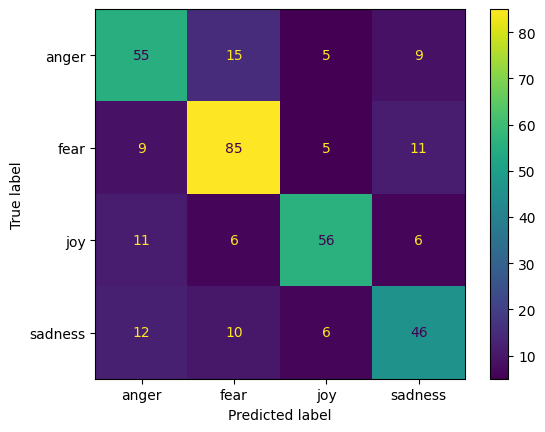

In [8]:
## Build Multinomial Naive Bayes classifier model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## Create and train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

## Predict
train_pred = mnb.predict(x_train)
test_pred = mnb.predict(x_test)

## Evaluate model
### Checking if model overfit or underfit
acc_train = accuracy_score(y_true=y_train, y_pred=train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=test_pred)

print('training accuracy: {:.2f}'.format(acc_train))
print('testing accuracy: {:.2f}'.format(acc_train))

## Check precision, recall, f1-score
print(classification_report(y_true=y_test, y_pred=test_pred))

## Create confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=test_pred)

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.  

*Decision tree accuracy*  
![](pics/d3_acc.PNG)

### **Answer**

The prediction accuracy of the **MultinomialNB model** is better than **Dicision tree** with 0.70 accuracy while Dicision tree got only 0.66 because of the improvement in predicted `fear` and `joy` emotion from 0.66 & 0.69(`fear`) and 0.70 & 0.68(`joy`) **Decision tree's** precision-recall value to 0.73 & 0.77(`fear`) and 0.78 & 0.71(`joy`) **MultinomialNB's** precision-recall value. The reason why MultinomialNB is performing better is because this model was base on `Naive Bayes` thorem that will learn the probability of the training data to make a decision to testing data. Whereas, Decision tree is based on `Greedy algorithm` approach that will make seperate all the features out of each other(no relation with others) and make a decision from best option available.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic3.png)![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic4.png)

In [9]:
## Deep learning

import keras
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer

### Prepare (x,y)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# standardize name (X, y) 
X_train = BOW_500.fit_transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [10]:
### Encode label

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return tf.keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2081        joy
2880    sadness
3227    sadness
664       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


C:\Users\supja\AppData\Local\Temp\ipykernel_20116\264210006.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [11]:
### Create Model

import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)        

In [12]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train.toarray(), y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 4ms/step - loss: 1.3347 - accuracy: 0.3579 - val_loss: 1.2882 - val_accuracy: 0.4121
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0162 - accuracy: 0.6452 - val_loss: 0.9626 - val_accuracy: 0.6398
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7883 - val_loss: 0.8109 - val_accuracy: 0.6974
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8494 - val_loss: 0.7989 - val_accuracy: 0.6945
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8840 - val_loss: 0.8030 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9092 - val_loss: 0.8509 - val_accuracy: 0.7061
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9275 - val_loss: 0.9210 - val_accuracy: 0.6859
Epoch 

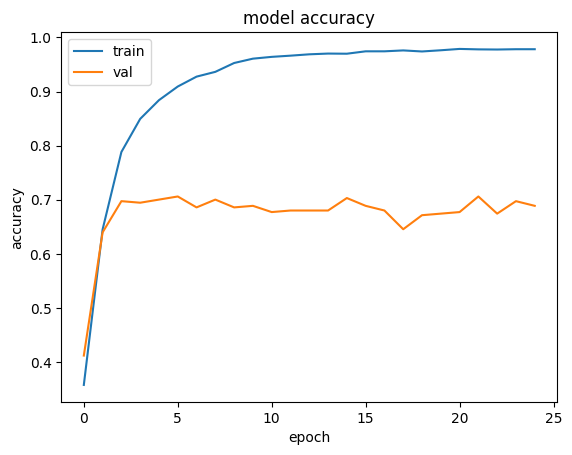

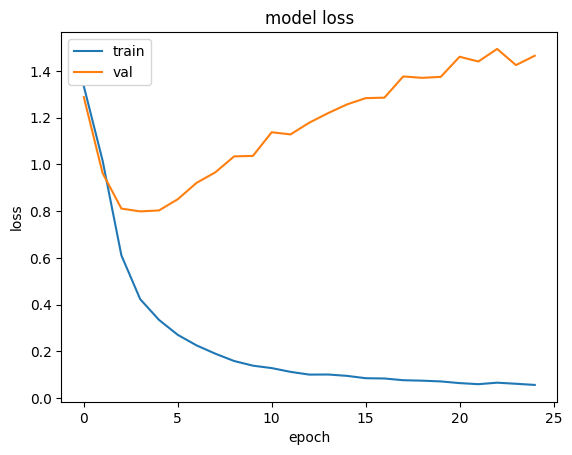

In [13]:
## Plotting graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Answer**

As shown in picture above we can say that our model is **Overfitting**.  

Since, the trend of the **training accuracy** tends to go up and **rising** from the `epoch-1` and saturate at the **accuracy score** of around `97%` within `10` epoch. While the **training loss** is **decreasing** and reach loss value of around `0.15`. Whereas, the **validation accuracy** has stop going up and saturate at the accuracy score around `70%` at `epoch-3`. However, the **validation loss** tends to **rise** at epoch-4 and reach loss value of around `1.4` at the end of the training phase.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### **Answer**

We can try to use sentence embedding technique such as `Doc2Vec` which base on `Word2Vec` algorithm. `Doc2Vec` was proposed with 2 approaches.
1. Distributed Memory model (DM):  
The training is done by passing a sliding window over the sentence, trying to predict the next word based on the previous words in the context and the sentence vector


2. Distributed Bag-Of-Words (DBOW):  
The training is done by selecting a random sentence from the corpus and selecting a random number of words from that sentence. The model will try to predict those words based only on the sentence ID and the sentence vector will be updated.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "" (60 words total).

In [14]:
%matplotlib inline
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Note: this model is very huge, this will take some time ...
model_path = "models/GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


angry_word: ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_word: ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_word: ['saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_word: ['fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


c:\Users\supja\.conda\envs\dm_lab2_kaggle\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\supja\.conda\envs\dm_lab2_kaggle\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


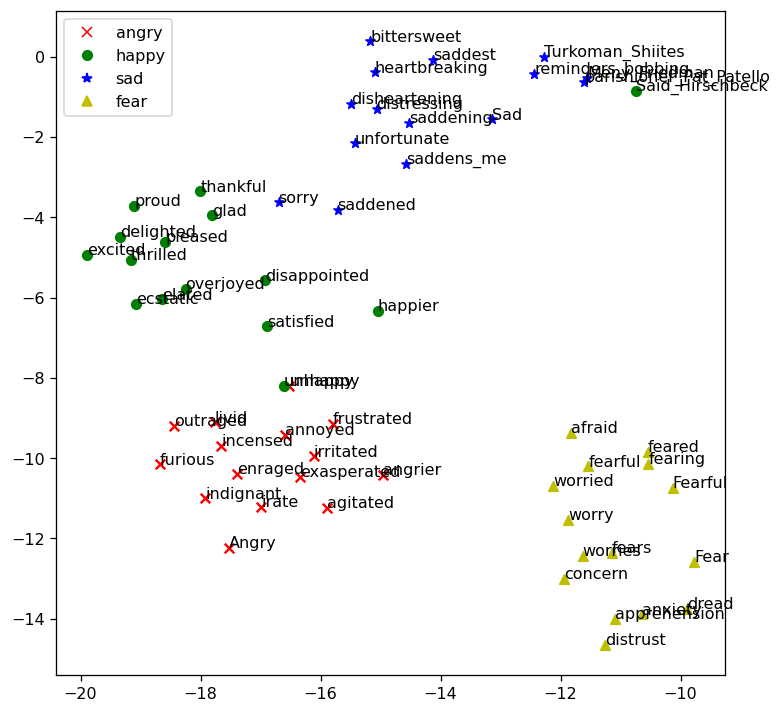

In [15]:
from matplotlib.lines import Line2D

#3 Get top 15 most similar word
top = 15

angry_word = [w for w, _ in model.most_similar('angry', topn=top)]
happy_word = [w for w, _ in model.most_similar('happy', topn=top)]
sad_word = [w for w, _ in model.most_similar('sad', topn=top)]
fear_word = [w for w, _ in model.most_similar('fear', topn=top)]
print('angry_word: {}'.format(angry_word))
print('happy_word: {}'.format(happy_word))
print('sad_word: {}'.format(sad_word))
print('fear_word: {}'.format(fear_word))


target_words = angry_word + happy_word + sad_word + fear_word
colors = ['r'] * len(angry_word) + ['g'] * len(happy_word) + ['b'] * len(sad_word) + ['y'] * len(fear_word)
markers = ['x'] * len(angry_word) + ['o'] * len(happy_word) + ['*'] * len(sad_word) + ['^'] * len(fear_word)
legend_elements = [Line2D([0],[0], marker= 'x', color='w',markeredgecolor='r', markerfacecolor='r', label='angry'),
                    Line2D([0],[0], marker= 'o', color='w',markeredgecolor='g', markerfacecolor='g', label='happy'),
                    Line2D([0],[0], marker= '*', color='w',markeredgecolor='b', markerfacecolor='b', label='sad'),
                    Line2D([0],[0], marker= '^', color='w',markeredgecolor='y', markerfacecolor='y', label='fear'),
                    ]

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
# plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=colors)
for label, x, y, c, m in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1], colors, markers):
    plt.scatter(x, y, c=c, marker=m)
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.legend(handles=legend_elements, loc='upper left')
plt.show()